## Predicting Additional Insurance Product Purchase - KNN and SVM Models - By Group2

### Introduction
In the competitive insurance industry, retaining customers and expanding relationships with them is key to business growth. One effective strategy is to offer additional products to existing customers. In this project, we aim to develop a predictive model that helps a large insurance company identify which of its current customers are most likely to purchase an additional insurance product.

Using a dataset with over 14,000 customer records, we will explore factors such as customer demographics, loyalty levels, product purchase behavior, and financial information to develop and evaluate models, specifically K-Nearest Neighbors (KNN) and Support Vector Machine (SVM). The insights derived from these models will assist the company in tailoring marketing strategies to improve customer retention and cross-selling efforts.

## Project Goal and Steps

1. **Introduction**  
   - Summarize the problem and objectives of the project.
   - Outline the plan to use K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models, and explain the intended steps in this approach.

2. **Exploratory Data Analysis (EDA)**  
   - Conduct thorough data exploration to identify trends, patterns, and outliers.
   - Draw preliminary inferences for predictive modeling and include relevant Python code.

3. **Data Preparation**  
   - Address all data integrity and usability issues, such as missing values and inconsistent formatting.
   - Prepare the dataset for modeling by ensuring it meets quality standards, with all relevant code provided.

4. **Post-Data Prep Review**  
   - Re-examine the dataset after data preparation to compare it with initial findings.
   - Highlight any improvements in data quality that will benefit model performance and provide post-prep Python code.

5. **Modeling with KNN and SVM**  
   - Build and tune KNN and SVM models, selecting features via RFE (Recursive Feature Elimination) and determining optimal hyperparameters (e.g., k-value for KNN, kernel functions for SVM).
   - Present the model outputs with Python code for each step.

6. **Model Selection**  
   - Define model selection criteria based on accuracy, cross-validation, ROC-AUC, and other relevant metrics.
   - Justify the choice of the preferred model by comparing it to previous assignment results, and apply it to the test set.

7. **Conclusions**  
   - Summarize the main findings and insights from the analysis, linking them to model performance and overall project goals.

---

Let’s begin by loading and exploring the dataset.


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [114]:
# Loading the dataset from the provided URL
df=pd.read_csv('https://raw.githubusercontent.com/dheerajyeshiva/DAV-6150/refs/heads/main/M7_Data.csv')

In [115]:
df.shape

(14016, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [117]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


### Exploratary Data Analysis & Data Preparation

In [118]:
# Getting count of number of unique values in each column
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'TARGET' has 2 unique values.
Column 'loyalty' has 5 unique values.
Column 'ID' has 11008 unique values.
Column 'age' has 86 unique values.
Column 'city' has 65 unique values.
Column 'LOR' has 7 unique values.
Column 'prod_A' has 2 unique values.
Column 'type_A' has 3 unique values.
Column 'type_B' has 4 unique values.
Column 'prod_B' has 2 unique values.
Column 'turnover_A' has 11008 unique values.
Column 'turnover_B' has 11008 unique values.
Column 'contract' has 1 unique values.
Column 'age_P' has 86 unique values.
Column 'lor_M' has 7 unique values.


In [119]:
# Checking if the DataFrame contains any missing (null) values
df.isnull().values.any()

False

In [120]:
df.duplicated().value_counts()  # Checking for duplicates

False    11008
True      3008
Name: count, dtype: int64

There are 3008 duplicate rows in the dataset

In [121]:
#dropping the duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [122]:
# Checking the shape of the dataset after dropping the duplicate values
df.shape

(11008, 15)

In [123]:
# dropping ID as it has all unique values and it is not gonna be useful for our further analysis and model building
df.drop('ID', axis=1, inplace=True)

In [124]:
# dropping contract feature as it has one unique value(2) which wont be useful too
df.drop('contract', axis=1, inplace=True)

In [125]:
# dropping LOR( Length of Relationship in years) as we can derive this using the LOR(in months)
df.drop('LOR', axis=1, inplace=True)

In [126]:
# Display the descriptive statistics
df.describe()

,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,46.533612,34.845203,-724.143078,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,34.845203,14.791788
std,48.292402,13.032781,26949.664365,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,13.032781,11.272981
min,0.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,2.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,24.000000,3.000000
50%,3.000000,31.000000,2.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,31.000000,15.000000
75%,99.000000,42.000000,2.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,42.000000,15.000000
max,99.000000,102.000000,235.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


### Insights:

#### 1. **Data Completeness**
- Each feature in the dataset contains **11,008** entries, indicating a complete dataset with no missing values.

#### 2. **Age Distribution**
- The average age of individuals in the dataset is approximately **34.85** years.
- Age ranges from a minimum of **5** years to a maximum of **102** years, indicating a wide demographic spread.

#### 3. **Loyalty Scores**
- The average loyalty score is around **46.53**, with a notable maximum score of **99**.
- A substantial portion of the dataset has a loyalty score of **3 or lower** (median), suggesting many individuals may be at the lower end of the loyalty spectrum.

#### 4. **City Values**
- The `city` feature shows a significant variance, with a mean of **-724.14** and a maximum value of **235**. The extreme minimum of **-999,999** suggests possible data quality issues or outliers that need addressing.

#### 5. **Product Preferences**
- The average values for product types (`prod_A` and `prod_B`) are relatively low, suggesting limited engagement with those products. Specifically:
  - `prod_A` has a mean of **0.58**.
  - `prod_B` has a mean of **0.65**.

#### 6. **Turnover Figures**
- The average turnover for `turnover_A` is about **372.33**, while `turnover_B` is significantly higher at **344.12**.
- The standard deviation of `turnover_B` is notably high (**524.37**), indicating a wide range of turnover values and potential outliers.

#### 7. **Age and Loyalty Correlation**
- The median age of individuals (31 years) aligns with the mean, suggesting a balanced distribution. Young individuals may show varying loyalty scores, with the average loyalty score of **14.79**.

These insights highlight important trends and potential areas for further investigation, such as data quality issues in the `city` feature and the need for strategies to enhance customer loyalty and product engagement.

In [127]:
# age and age_p are same values and hence one of them can be dropped too
df.drop('age_P', axis=1, inplace=True)

In [128]:
df.columns

Index(['TARGET', 'loyalty', 'age', 'city', 'prod_A', 'type_A', 'type_B',
       'prod_B', 'turnover_A', 'turnover_B', 'lor_M'],
      dtype='object')

In [129]:
# Count the occurrences of each category in the TARGET variable
df.TARGET.value_counts()

TARGET
N    8000
Y    3008
Name: count, dtype: int64

In [130]:
# Changing the Target values from string to boolean
df['TARGET']=df['TARGET'].apply(lambda x:1 if x=='Y' else 0)

In [131]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,3,1,394.735699,284.904978,39
2,1,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


In [132]:
# Group by 'prod_A' and 'type_A' and count the occurrences
prod_type_count_a = df.groupby(['prod_A', 'type_A']).size().reset_index(name='count')
prod_type_count_a

,prod_A,type_A,count
0,0,0,4575
1,1,3,6410
2,1,6,23


In [133]:
# Group by 'prod_B' and 'type_B' and count the occurrences
prod_type_count_b = df.groupby(['prod_B', 'type_B']).size().reset_index(name='count')
prod_type_count_b

,prod_B,type_B,count
0,0,0,3828
1,1,3,6695
2,1,6,452
3,1,9,33


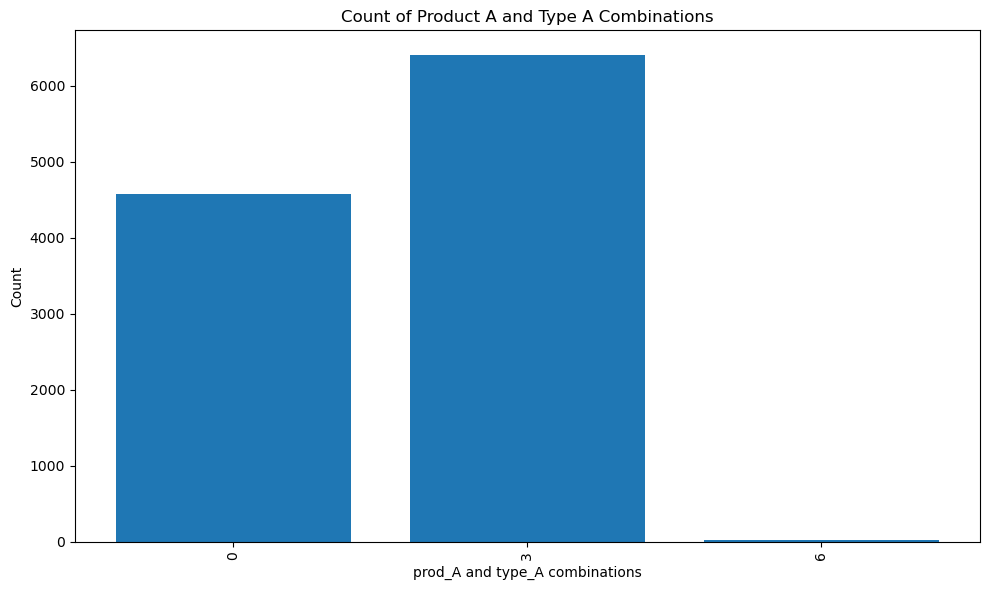

In [134]:
# Creating bar plot of 'type_A' at x-axis and 'count' as the y-axis to visualizes the distribution of purchases across different types of Product A
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_a['type_A'].astype(str), prod_type_count_a['count'])

# Set the labels and title
plt.xlabel('prod_A and type_A combinations')
plt.ylabel('Count')
plt.title('Count of Product A and Type A Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

The bar chart illustrates the counts of different combinations of product A and type A. There are three unique combinations: 0, 3, and 6. The combination with 0 occurrences is the least common, while the one with 3 occurrences is the most common. The combination with 6 occurrences ranks as the second least common.

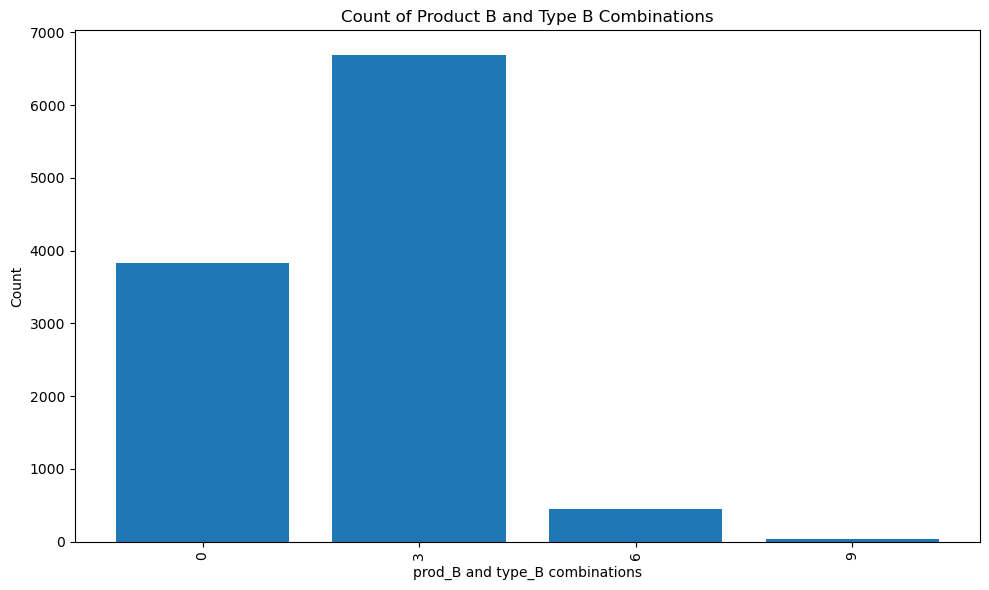

In [135]:
# Creating bar plot of 'type_A' at x-axis and 'count' as the y-axis to visualizes the distribution of purchases across different types of Product A
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_b['type_B'].astype(str), prod_type_count_b['count'])

# Set the labels and title
plt.xlabel('prod_B and type_B combinations')
plt.ylabel('Count')
plt.title('Count of Product B and Type B Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

The bar chart illustrates the counts of combinations of product B and type B. There are four distinct combinations: 0, 3, 6, and 9. The combination with 0 occurrences is the second least common, while the combination with 3 occurrences is the most common. The combination with 6 occurrences is the least common, and the one with 9 occurrences is the second most common.

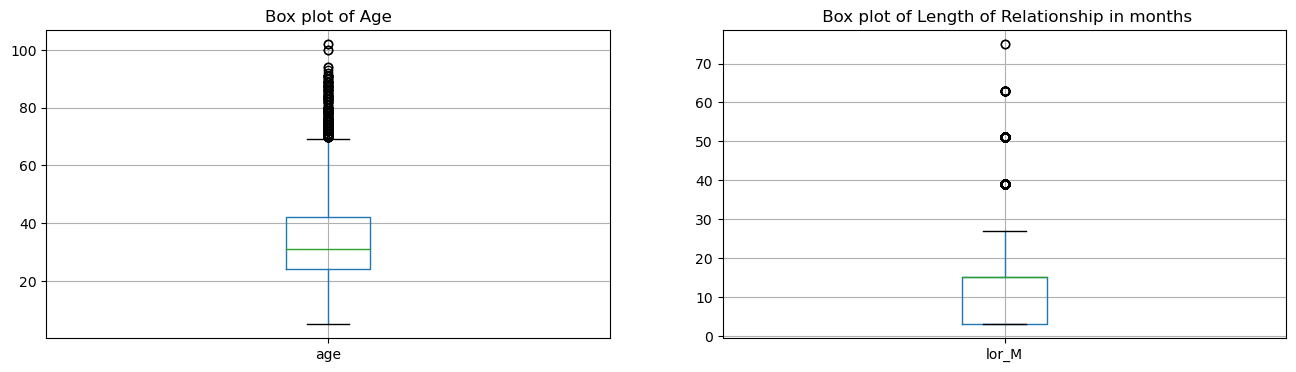

In [136]:
# Create a box plot for the 'age'  and 'lor_M' column to visualize its distribution and identify outliers
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
df.boxplot(column='age');
plt.title("Box plot of Age");


plt.subplot(1, 2, 2)
df.boxplot(column='lor_M');
plt.title(" Box plot of Length of Relationship in months");

1. The median age (from the 'age' column) of around 40 indicates a mature demographic, while the median length of relationship (from the 'lor_M' column) of 15 months reflects generally shorter relationships.
2. Both distributions exhibit the same interquartile range of 20, suggesting comparable variability in age and relationship length across the dataset.
3. Outliers are present in both distributions, with age outliers at the higher end and relationship length outliers appearing on both ends, highlighting diverse relationship dynamics.

### Prepped Data Review

In [137]:
df['loyalty'].value_counts()

loyalty
99    5048
3     2701
1     2019
2     1184
0       56
Name: count, dtype: int64

The dataset categorizes loyalty levels as 0: None, 1: Low, 2: Medium, 3: High, and 99: Unclassified. The unclassified group (99) is the most prevalent, with 5,048 instances, suggesting a large portion of customers whose loyalty status is undefined. The high loyalty category (3) follows with 2,701 occurrences, indicating a significant number of highly loyal customers. Low loyalty (1) has 2,019 counts, representing a sizable group that could benefit from loyalty-building efforts. Medium loyalty (2) accounts for 1,184 occurrences, while the no-loyalty group (0) is the least common, with just 56 instances. This distribution highlights opportunities to classify unclassified customers and target low-loyalty groups for engagement.

In [138]:
def plot_countplots(df, columns):
    """
    Plots countplots for specified columns in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to create countplots for.
    """
    # Set the number of subplots based on the number of columns
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Arrange plots in rows

    plt.figure(figsize=(12, num_rows * 4))  # Adjust figure size

    for i, column in enumerate(columns):
        plt.subplot(num_rows, 2, i + 1)  # Create subplot
        sns.countplot(data=df, x=column, hue='TARGET')  # Create countplot
        plt.title(f'Count Plot for {column}')
        # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots



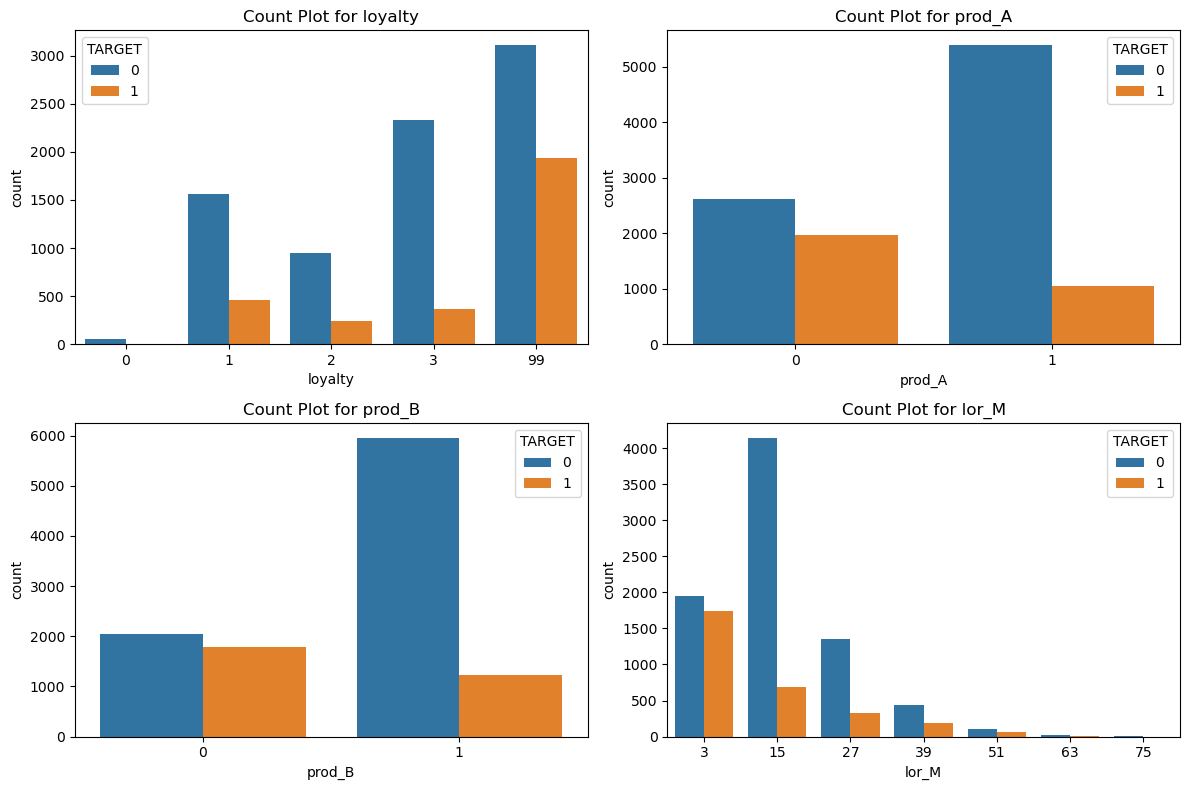

In [139]:
plot_countplots(df, ['loyalty','prod_A','prod_B','lor_M'])

**Strong Loyalty Influence**: The significant difference in counts between loyalty levels 0 and 1 suggests that loyalty may play a crucial role in the dataset. Higher loyalty levels could be linked to more favorable outcomes, making it a key factor to investigate further.

**Moderate Product Engagement**: While there is a difference in counts for prod_A and prod_B, the variation is less dramatic than that observed for loyalty. This indicates that while products A and B are relevant, loyalty might have a more pronounced impact on customer behavior or outcomes.

**Potential Relationship Trends**: The decreasing trend in the length of relationship (lor M) suggests that as the relationship length increases, the count of observations decreases. This might indicate that shorter relationships are more common, which could affect customer retention strategies.

In [140]:
df.TARGET.value_counts()

TARGET
0    8000
1    3008
Name: count, dtype: int64

### One Hot Encoding

In [141]:
# we shall perform one hot encoding on loyalty
df['loyalty'] = df['loyalty'].replace({0: 'loyalty_0', 1: 'loyalty_1', 2: 'loyalty_2', 3: 'loyalty_3', 99: 'loyalty_99'})

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['loyalty'], prefix='', prefix_sep='')

df.head()
# # Rename the loyalty columns
df.rename(columns={
    'loyalty_0': 'loyalty_none',
    'loyalty_1': 'loyalty_low',
    'loyalty_2': 'loyalty_medium',
    'loyalty_3': 'loyalty_high',
    'loyalty_99': 'loyalty_unclassified'
}, inplace=True)

df.head()


,TARGET,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified
0,1,66,2,0,0,0,0,333.561114,264.721010,3,False,False,False,False,True
1,1,45,2,1,3,3,1,394.735699,284.904978,39,False,True,False,False,False
2,1,42,2,1,3,6,1,342.180990,1175.589721,27,False,True,False,False,False
3,1,31,2,0,0,0,0,453.757916,242.341754,3,False,False,False,False,True
4,1,62,2,0,0,0,0,384.577469,287.008370,3,False,False,False,False,True


In [142]:
df.dtypes

TARGET                    int64
age                       int64
city                      int64
prod_A                    int64
type_A                    int64
type_B                    int64
prod_B                    int64
turnover_A              float64
turnover_B              float64
lor_M                     int64
loyalty_none               bool
loyalty_low                bool
loyalty_medium             bool
loyalty_high               bool
loyalty_unclassified       bool
dtype: object

In [143]:
df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']] = df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']].astype(int)

In [144]:
df.city.value_counts()

city
2      10769
0         20
1         17
8         17
9         16
       ...  
72         1
31         1
51         1
107        1
30         1
Name: count, Length: 65, dtype: int64

In [145]:
len(df[df.city == -999999])

8

The value -999999 in your city column is likely an invalid placeholder or a missing data indicator. This is a common approach when datasets use extreme or unlikely values to represent missing or undefined entries (also called sentinel values).

In [146]:
# Drop rows the with value -999999 as the number  of the rows are around 8 values which is pretty less
df = df[df.city != -999999]
df.shape

(11000, 15)

In [147]:
# Replace other city codes with 'other_city'
df['city'] = df['city'].apply(lambda x: 'city_2' if x == 2 else 'other_city')

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['city'], prefix='', prefix_sep='')


In [148]:
df[['city_2','other_city']] = df[['city_2','other_city']].astype(int)

In [149]:
df.head()

,TARGET,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified,city_2,other_city
0,1,66,0,0,0,0,333.561114,264.721010,3,0,0,0,0,1,1,0
1,1,45,1,3,3,1,394.735699,284.904978,39,0,1,0,0,0,1,0
2,1,42,1,3,6,1,342.180990,1175.589721,27,0,1,0,0,0,1,0
3,1,31,0,0,0,0,453.757916,242.341754,3,0,0,0,0,1,1,0
4,1,62,0,0,0,0,384.577469,287.008370,3,0,0,0,0,1,1,0


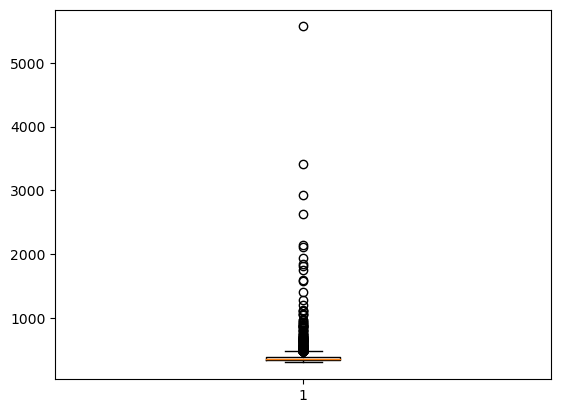

In [150]:
plt.boxplot(df['turnover_A'])
plt.show()

**Significant Right Skew:** The distribution of turnover_A is skewed to the right, indicating that while most data points are concentrated around the median (approximately 1000), a small number of observations have exceptionally high values. This suggests that there are key factors or unique circumstances driving high turnover, which warrants further investigation.

**Presence of High Outliers:** The presence of several outliers on the high end of the distribution indicates that a few clients or transactions generate significantly higher turnover. Understanding the characteristics of these outliers could reveal valuable insights for targeting high-value customers or optimizing strategies for increased turnover.

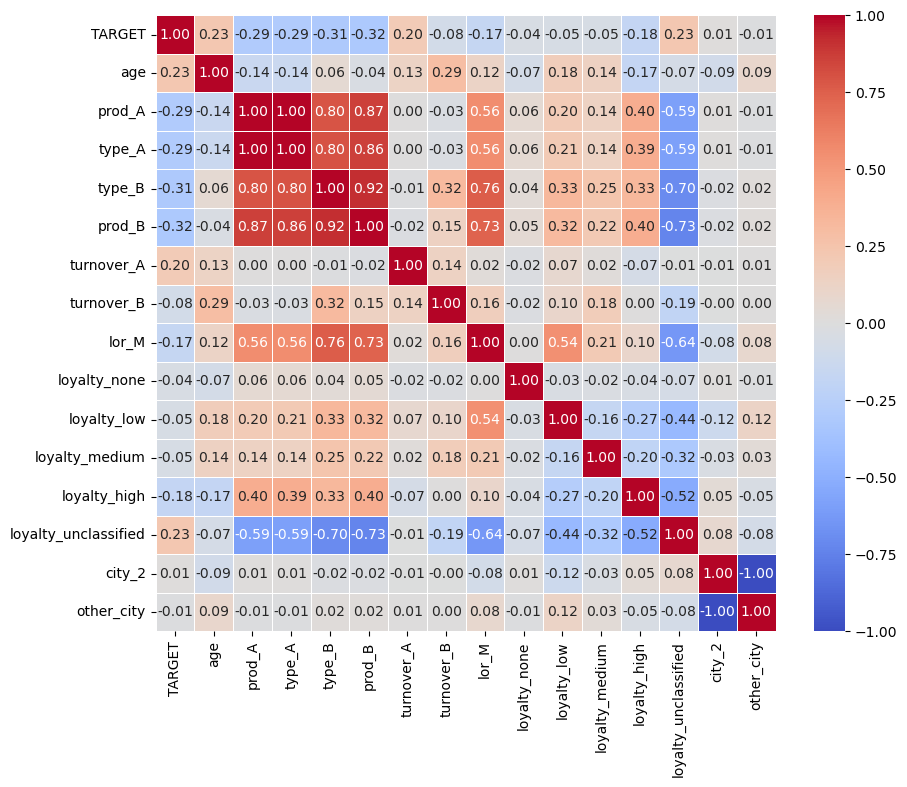

In [151]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

### Correlation Heatmap Summary

- **Target Correlations**:
  - `age` has the highest positive correlation with the target (`0.23`).
  - `prod_B` and `type_B` show negative correlations.

- **Feature Correlations**:
  - Strong correlation between `prod_A` and `type_A` (`0.80`), and between `prod_B` and `type_B` (`0.76`).
  - `loyalty_unclassified` negatively correlates with `prod_A` and `type_A` (`-0.59`).

- **Insights**:
  - Features like `prod_A` and `type_A` may indicate multicollinearity.
  - Weak target correlations suggest exploring non-linear models.


Boxplot for age


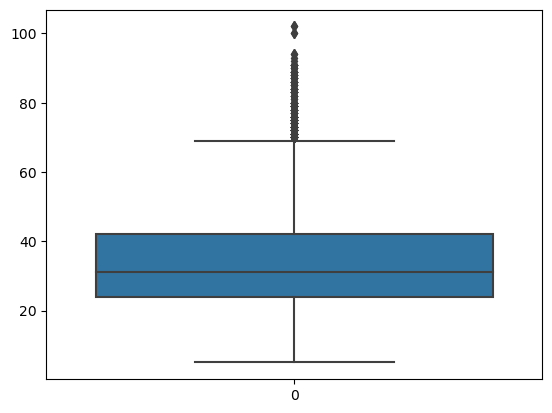



Boxplot for turnover_A


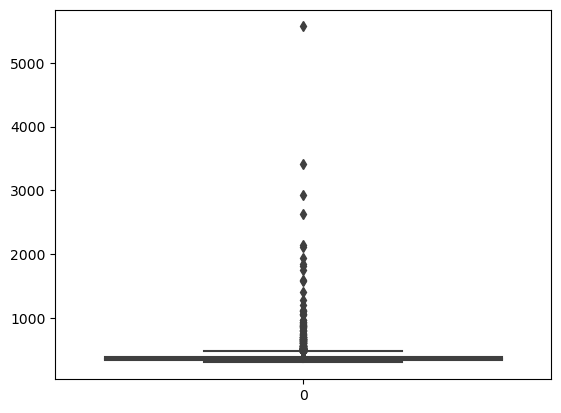



Boxplot for turnover_B


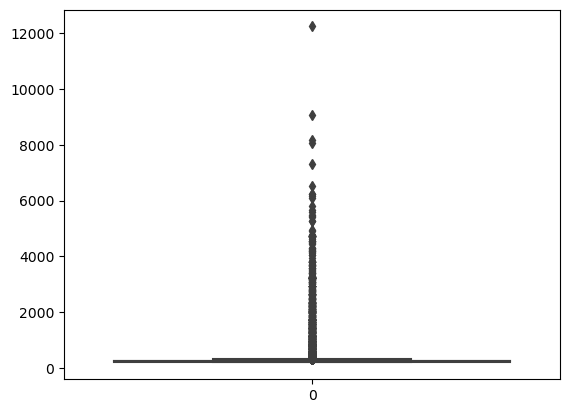



Boxplot for lor_M


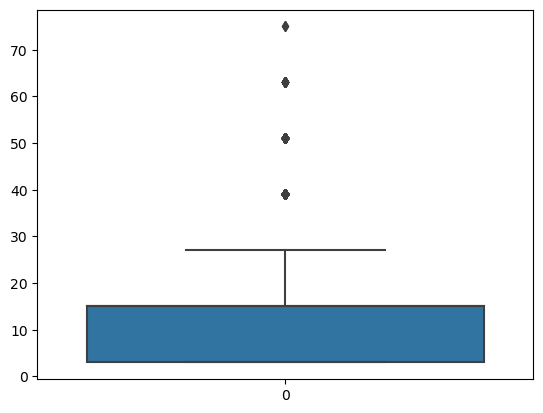

In [152]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

####Graph 1: Age Distribution
The first boxplot represents the distribution of age, with the median around 40 and an interquartile range (IQR) between 25 and 60. There are significant outliers above 80.

####Graph 2: Turnover_A Distribution
The second boxplot displays a highly skewed distribution of "turnover_A", with most data points concentrated near the lower end, while a considerable number of outliers exceed 1000, stretching up to 5000.

####Graph 3: Turnover_B Distribution
The boxplot shows the distribution of "turnover_B" with a significant concentration of data points near the lower end. There are numerous extreme outliers, with values reaching above 12000, indicating a highly skewed distribution.

####Graph 4: LOR_M Distribution
This boxplot shows a right-skewed distribution of `lor_M` with several outliers above 30.




Histogram for age


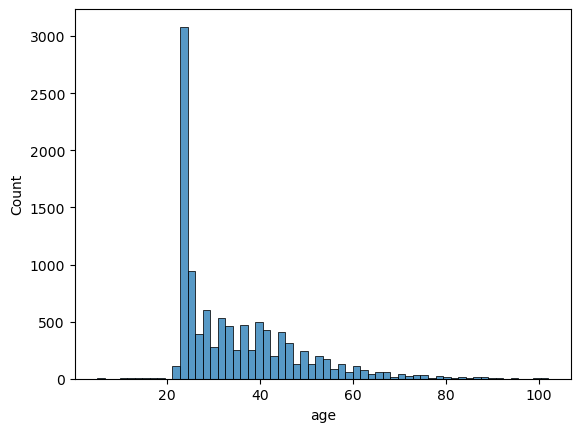



Histogram for turnover_A


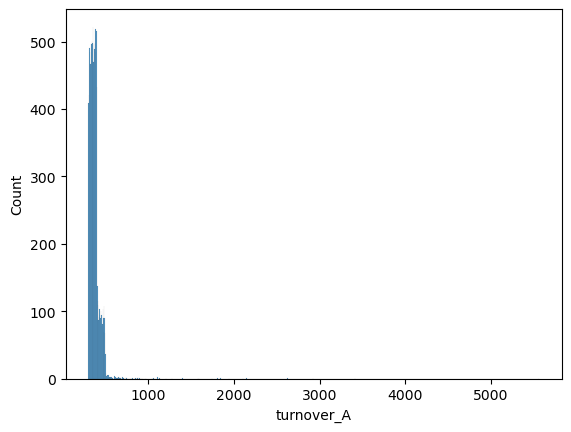



Histogram for turnover_B


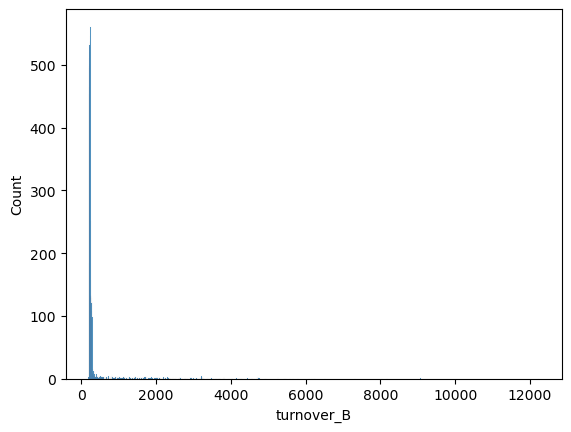



Histogram for lor_M


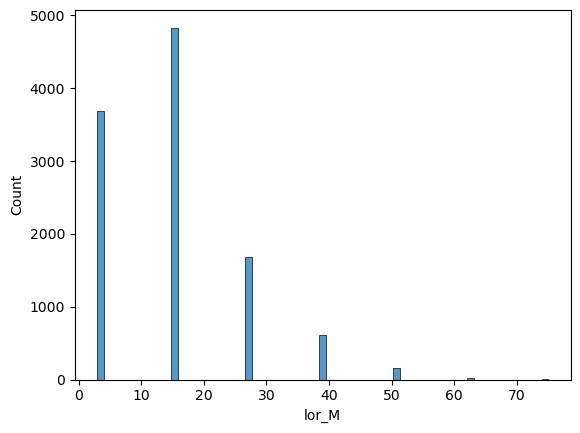

In [153]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Histogram for {i}")
  sns.histplot(df[i])
  plt.show()
  print("\n")

####GRAPH1 :
This histogram of `age` shows a right-skewed distribution, with a large concentration of individuals in their early 20s and a gradual decline in frequency as age increases.

####GRAPH2 :
The histogram displays the frequency distribution of the `turnover_A` variable. The data is heavily skewed to the right, with the majority of values concentrated below 1000. A few outliers extend to values greater than 1000, reaching as far as 5000, though their frequency is significantly lower.



####GRAPH3 :
The histogram shows a highly right-skewed distribution for `turnover_B`, with the majority of data points concentrated below 2000, while a few outliers extend up to 12000.


####GRAPH4 :
The graph shows a left-skewed distribution of `lor_M`, with most values concentrated between 0 and 30, peaking around 10 and 20.

### Standard Scalar

In [154]:
df = df.reset_index(drop='Index')

In [155]:
# Expect prod_A and prod_B Applying standard scalar on every feature
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


# Fit the scaler on the data and transform the data
scaled_data = scalar.fit_transform(df[['age', 'turnover_A', 'turnover_B', 'lor_M']])
cols =['std_' + col for col in ['age', 'turnover_A', 'turnover_B', 'lor_M']]

# Convert scaled data back to a DataFrame for better visualization
scaled_df = pd.DataFrame(scaled_data, columns=cols)
# df = pd.concat([df,scaled_data], axis = 1)
# df.head()

In [156]:
df = pd.concat([df,scaled_df], axis = 1)
df.head()

,TARGET,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified,city_2,other_city,std_age,std_turnover_A,std_turnover_B,std_lor_M
0,1,66,0,0,0,0,333.561114,264.721010,3,0,0,0,0,1,1,0,2.390098,-0.400870,-0.151529,-1.046420
1,1,45,1,3,3,1,394.735699,284.904978,39,0,1,0,0,0,1,0,0.779054,0.231698,-0.113049,2.146835
2,1,42,1,3,6,1,342.180990,1175.589721,27,0,1,0,0,0,1,0,0.548905,-0.311737,1.585013,1.082417
3,1,31,0,0,0,0,453.757916,242.341754,3,0,0,0,0,1,1,0,-0.294974,0.842010,-0.194195,-1.046420
4,1,62,0,0,0,0,384.577469,287.008370,3,0,0,0,0,1,1,0,2.083232,0.126658,-0.109039,-1.046420


Boxplot for std_age


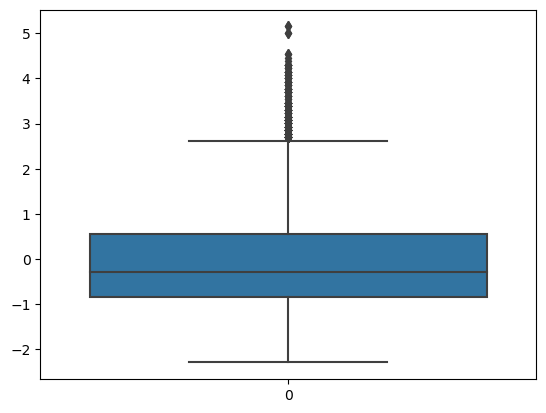



Boxplot for std_turnover_A


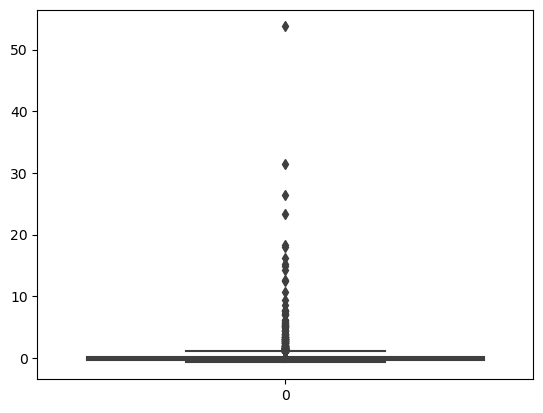



Boxplot for std_turnover_B


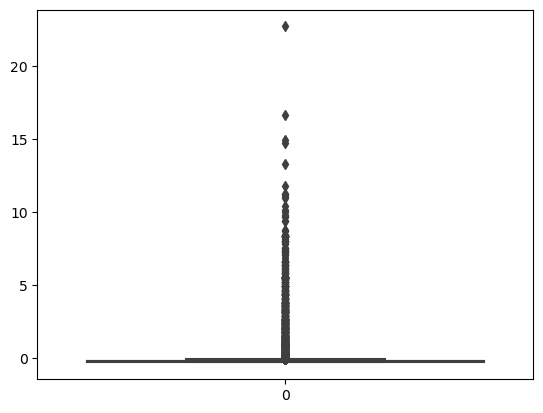



Boxplot for std_lor_M


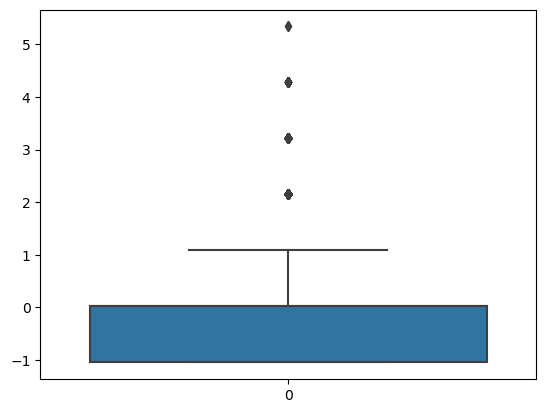

In [157]:
for i in cols:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

This boxplot after applying a StandardScalar transformation ('std_age', 'std_turnover_A', 'std_turnover_B',
       'std_lor_M') shows a more symmetrical distribution with fewer extreme outliers, improving interpretability and reducing the impact of skewness. Log scaling helps by compressing the range of values, making data more homogenous and highlighting central tendencies without being overly influenced by extreme values.


In [158]:
# drop all the non log transformed columns :
df.drop(['age', 'turnover_A', 'turnover_B', 'lor_M'],axis=1,inplace=True)

In [159]:
df.columns

Index(['TARGET', 'prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
       'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
       'city_2', 'other_city', 'std_age', 'std_turnover_A', 'std_turnover_B',
       'std_lor_M'],
      dtype='object')

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def LR_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

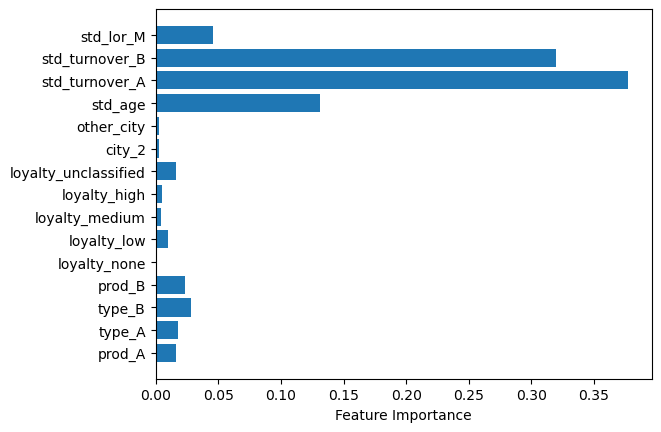

                 Feature  Importance
12        std_turnover_A    0.377072
13        std_turnover_B    0.319982
11               std_age    0.130933
14             std_lor_M    0.045497
2                 type_B    0.027927
3                 prod_B    0.023560
1                 type_A    0.018083
8   loyalty_unclassified    0.016538


In [161]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

# Create and train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plotting feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.show()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 8 most important features
print(feature_importances.head(8))

In [162]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df.drop("TARGET", axis = 1)
y = df['TARGET']

# Initialize the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=8)

# Fit RFE
rfe.fit(X, y)

# Get the mask of selected features (True means selected)
selected_features = rfe.support_

# Create a DataFrame for better visualization
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features
})

# Filter out the selected features
top_features_rfe = rfe_features[rfe_features['Selected']]['Feature'].values
X_top_rfe = X[top_features_rfe]

# Print the selected top 8 features
print(top_features_rfe)


['type_A' 'type_B' 'prod_B' 'loyalty_unclassified' 'std_age'
 'std_turnover_A' 'std_turnover_B' 'std_lor_M']


### Model Building

In [163]:
df.shape

(11000, 16)

In [164]:
X= df[top_features_rfe]  # independent variable
y = df.TARGET            # Target varaible

In [165]:
X2 = df[['std_age','std_turnover_A','std_turnover_B' ]]   # independent variable
y2 = df["TARGET"]                                         # Target varaible

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def class_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

def ROC_AUC_curve(y_test, y_pred):
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [167]:
# splitting the data into training and testing set into 75: 25
from sklearn.model_selection import train_test_split

# Train test split on first dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train test split on second dataframe
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

### Model 1: Generalized KNN model knn1:

In [169]:
# Define a generalized KNN model to set hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
scores = cross_val_score(knn1, X_train, y_train, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')
class_metrics(y_test, y_pred)


average cv score 0.8370909090909091
Accuracy Score: 0.8421818181818181
Confusion Matrix: 
[[1855  150]
 [ 284  461]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2005
           1       0.75      0.62      0.68       745

    accuracy                           0.84      2750
   macro avg       0.81      0.77      0.79      2750
weighted avg       0.84      0.84      0.84      2750



ROC AUC Score: 0.7719894893638387


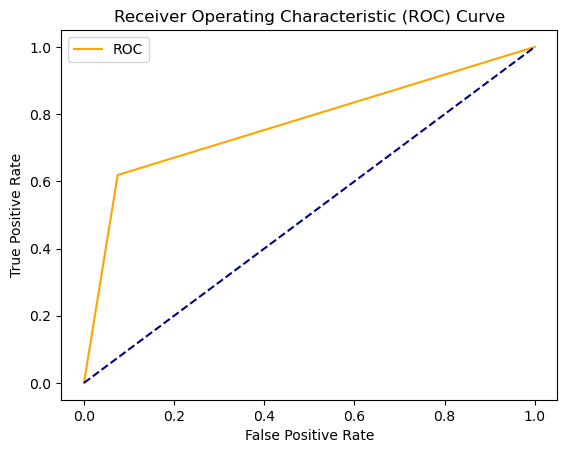

In [170]:
ROC_AUC_curve(y_test, y_pred)

### KNN Model 1:

- **8** independent variables, selected using RFE (Recursive Feature Elimination), were used to build the model.
- The accuracy score on the test data is approximately 0.8447.
- The ROC-AUC score is 0.7792. Based on the curve, we can say the model is decent, but other machine learning models could be explored to improve the ROC-AUC score.


The optimal number of neighbors is 13


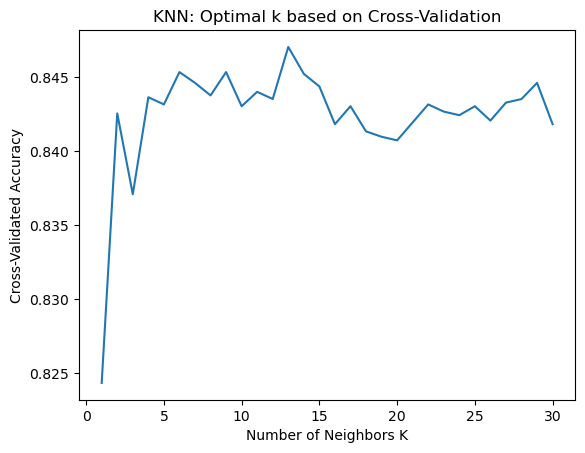

In [171]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a range of k values to test
k_range = range(1, 31)

# Create a list to store cross-validation scores for each k
cv_scores = []

# Perform cross-validation to find the best k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 10-fold cross-validation and take the mean of the accuracy scores
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k (the one with the highest cross-validation score)
optimal_k = k_range[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# Plotting the results
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Optimal k based on Cross-Validation')
plt.show()

### KNN Cross-Validation Analysis: Key Observations


* Optimal k value = 9 neighbors, Use k=9 for optimal model performance.
* Peak accuracy is over 0.85.
* Avoid k values > 15 due to declining accuracy.

### KNN model for Optimal value of k for df1: knn2

In [172]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
scores = cross_val_score(knn2, X_train, y_train, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')
class_metrics(y_test, y_pred)


average cv score 0.8453333333333333
Accuracy Score: 0.8552727272727273
Confusion Matrix: 
[[1916   89]
 [ 309  436]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2005
           1       0.83      0.59      0.69       745

    accuracy                           0.86      2750
   macro avg       0.85      0.77      0.80      2750
weighted avg       0.85      0.86      0.85      2750



### KNN Model 2:

- **8** important variables, selected using RFE (Recursive Feature Elimination), were used to build the model.
- The accuracy score on the test data is approximately 0.8614.
- The average cross-validation (CV) accuracy score is approximately 0.8528.

In [173]:
# knn model for top 3 most important variables
knn3 = KNeighborsClassifier(n_neighbors=9)
knn3.fit(X_train2, y_train2)
y_pred = knn3.predict(X_test2)
scores = cross_val_score(knn3, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')
class_metrics(y_test2, y_pred)

average cv score 0.8429090909090909
Accuracy Score: 0.8527272727272728
Confusion Matrix: 
[[1892  113]
 [ 292  453]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2005
           1       0.80      0.61      0.69       745

    accuracy                           0.85      2750
   macro avg       0.83      0.78      0.80      2750
weighted avg       0.85      0.85      0.85      2750



### KNN Model 3:

- **3** important variables, selected using RFE (Recursive Feature Elimination), were used to build the model.
- The accuracy score on the test data is approximately 0.8528.
- The average cross-validation (CV) accuracy score is approximately 0.8429.

### KNN Model Comparison

### Model Comparison

| Model         | Mean CV Score | Precision (Class 1) | Recall (Class 1) | Accuracy (Test) |
|---------------|---------------|---------------------|------------------|-----------------|
| Model 1 (KNN1) | 0.8452       | 0.75               | 0.64            | 0.8447          |
| Model 2 (KNN2) | 0.8528       | 0.84               | 0.60            | 0.8614          |
| Model 3 (KNN3) | 0.8429       | 0.80               | 0.61            | 0.8528          |

### Summary
- **Model 1** has the lowest performance among the three models, particularly in terms of Accuracy on Test data, suggesting that it may not generalize as well on new data.
- **Model 2** shows the best performance overall, with the highest mean cross-validation score (0.8528) and accuracy on the test data (0.8614). It also demonstrates strong precision (0.84) and is well-balanced between both classes.
- **Model 3** has slightly lower accuracy (0.8528) but provides a good balance between precision and recall.


Given the evaluation metrics, **Model 3** emerges as the most suitable choice. While it shows a slight decrease in accuracy compared to the other models, its reduced complexity significantly enhances runtime efficiency, making it an optimal solution in terms of performance and computational demands. This balance between accuracy and simplicity allows for effective predictions without compromising speed or scalability.


### SVM Models

Generalized SVM model:

In [174]:
from sklearn.svm import SVC
# Initialize the SVM model (with RBF kernel)
svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model on the training data
svm_rbf_model.fit(X_train, y_train)
scores = cross_val_score(svm_rbf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')

# Make predictions on the test data
y_pred_rbf = svm_rbf_model.predict(X_test)

class_metrics(y_test, y_pred_rbf)


average cv score 0.8284848484848485
Accuracy Score: 0.8341818181818181
Confusion Matrix: 
[[1924   81]
 [ 375  370]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      2005
           1       0.82      0.50      0.62       745

    accuracy                           0.83      2750
   macro avg       0.83      0.73      0.76      2750
weighted avg       0.83      0.83      0.82      2750



Average CV Score: 0.83, Accuracy: 0.84.

- **Class 0**: Precision 0.84, Recall 0.96, F1-score 0.90
- **Class 1**: Precision 0.82, Recall 0.51, F1-score 0.63

The model demonstrates good accuracy with high precision for both classes, though recall is lower for Class 1, indicating room for improvement in detecting minority cases.


#### Hyper parameter tuning:

In [175]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
# 'C' is the regularization parameter, 'gamma' defines the influence of a single training example,
# and 'kernel' specifies the type of kernel to be used in the algorithm
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}

# Initialize GridSearchCV with an SVM model (SVC), specifying the parameter grid,
# setting refit=True to refit the model with the best parameters found,
# verbose=2 for more detailed output, and cv=5 for 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the GridSearchCV object on the training data (X_train, y_train)
# This will perform a grid search to find the best combination of parameters
grid.fit(X_train, y_train)

# Output the best parameters identified during the grid search
print("Best Parameters: ", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.8s
[CV] END ......................C=0.1, gamma=auto

### SVM Model1:

In [176]:
# Perform SVM on 8 most important variables.
svm_rbf_model = SVC(kernel='rbf', C=10, gamma='auto',)

# Fit the model on the training data
svm_rbf_model.fit(X_train, y_train)
scores = cross_val_score(svm_rbf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')

# Make predictions on the test data
y_pred_rbf = svm_rbf_model.predict(X_test)

class_metrics(y_test, y_pred_rbf)


average cv score 0.867030303030303
Accuracy Score: 0.8701818181818182
Confusion Matrix: 
[[1951   54]
 [ 303  442]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2005
           1       0.89      0.59      0.71       745

    accuracy                           0.87      2750
   macro avg       0.88      0.78      0.81      2750
weighted avg       0.87      0.87      0.86      2750



Average CV Score: 0.87, Accuracy: 0.87.

- **Class 0**: Precision 0.87, Recall 0.97, F1-score 0.92
- **Class 1**: Precision 0.89, Recall 0.60, F1-score 0.72

Overall, the model performs well with high accuracy and balanced metrics across classes, though recall for Class 1 is moderate.


ROC AUC Score: 0.7831779611374249


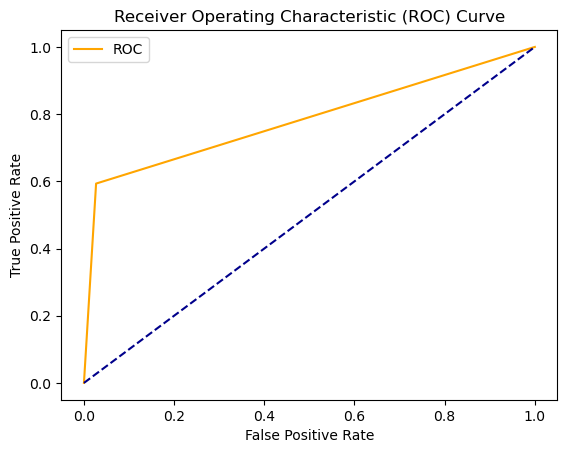

In [177]:
ROC_AUC_curve(y_test, y_pred_rbf)

### SVM Model 2:

In [178]:
# Perform SVM on top 3 important variables.
svm_rbf_model = SVC(kernel='rbf', C=10, gamma='auto',)

# Fit the model on the training data
svm_rbf_model.fit(X_train2, y_train2)
scores = cross_val_score(svm_rbf_model, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'average cv score {scores.mean()}')

# Make predictions on the test data
y_pred_rbf = svm_rbf_model.predict(X_test2)

class_metrics(y_test2, y_pred_rbf)


average cv score 0.8294545454545454
Accuracy Score: 0.8330909090909091
Confusion Matrix: 
[[1956   49]
 [ 410  335]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.98      0.89      2005
           1       0.87      0.45      0.59       745

    accuracy                           0.83      2750
   macro avg       0.85      0.71      0.74      2750
weighted avg       0.84      0.83      0.81      2750



### SVM Model Comparison

#### Model Comparison Afrer Hyper parameter tuning

| Model           | Mean CV Score | Precision (Class 1) | Recall (Class 1) | Accuracy (Test) |
|-----------------|---------------|---------------------|------------------|-----------------|
| Model 1 (SVM1)  | 0.8699        | 0.89               | 0.60            | 0.8727          |
| Model 2 (SVM2)  | 0.8295        | 0.87               | 0.45            | 0.8331          |

#### Summary
- **Model 1** shows the best performance overall, with the highest mean cross-validation score (0.8699) and test accuracy (0.8727). It also provides strong precision for class 1 (0.89) and has a balanced recall and F1-score, making it suitable for handling class imbalance while maintaining accuracy.
- **Model 2** has lower accuracy (0.8331) and cross-validation score (0.8295). Although it performs reasonably well in precision, the recall is lower, indicating it may miss more cases in class 1.

Given the evaluation metrics, **Model 1** is the most suitable choice. It demonstrates high performance with a good balance of precision, recall, and overall accuracy, making it effective for predictions without sacrificing recall or precision for either class.


### Final Conclusion

In this analysis, we explored multiple K-Nearest Neighbors (KNN) models and Support Vector Machine (SVM) models to predict the target variable.

1. **KNN Models:**
   - **Model 1**: Using 8 features, the accuracy was 0.8447, with an ROC-AUC score of 0.7792, indicating decent performance.
   - **Model 2**: With 8 RFE-selected features, it achieved a higher accuracy of 0.8614 and a CV score of 0.8528, suggesting a reliable fit.
   - **Model 3**: With 3 features, the model scored an accuracy of 0.8528 and CV score of 0.8429, showing reduced performance but more simplicity.

2. **SVM Models**:
   - **Model 1 (SVM1)**: Achieved the highest accuracy at 0.8727 and mean CV score of 0.8699. Its balanced precision (0.89) and recall (0.60) make it well-suited for handling class imbalance effectively.
   - **Model 2 (SVM2)**: Showed lower performance, with accuracy at 0.8331 and mean CV score of 0.8295. Lower recall suggests it may underperform for minority classes.

### Conclusion
**SVM Model 1 (SVM1)** is the most effective choice, offering a balance between precision, recall, and accuracy, and demonstrating strong overall performance in handling class imbalance. Among the KNN models, **Model 2** offers the best balance of accuracy and cross-validation reliability.
